In [1]:
import pandas as pd
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**OBSERVATION** :

*1. AGE = 177 NULL VALUES*

*2. CABIN = 687 NULL VALUES*

*3. EMBARKED = 2 NULL VALUES*

In [7]:
df.drop(columns=['PassengerId','Name','Cabin', 'Ticket'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


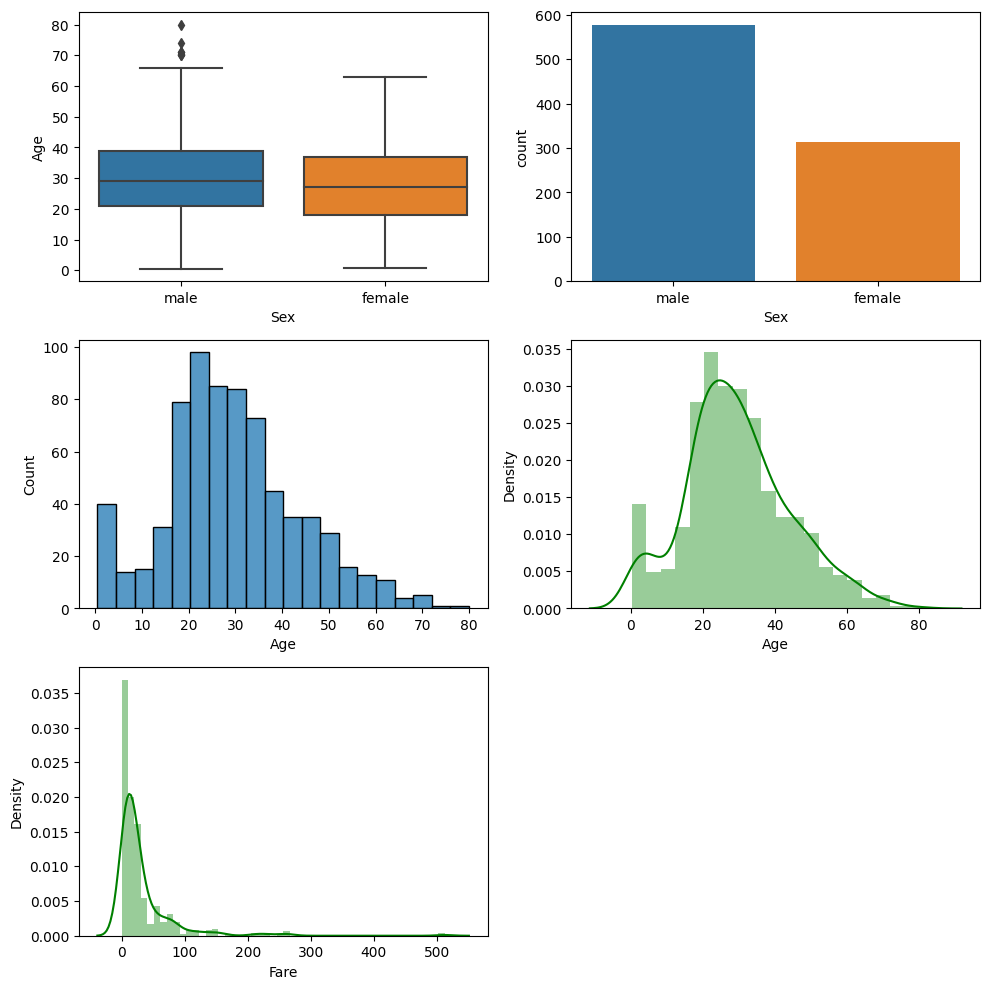

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.boxplot(x='Sex', y = 'Age',data = df)

plt.subplot(3,2,2)
sns.countplot(x ='Sex', data=df)

plt.subplot(3,2,3)
sns.histplot(df['Age'])

plt.subplot(3,2,4)
sns.distplot(df['Age'],color='g')

plt.subplot(3,2,5)
sns.distplot(df['Fare'],color='g')


plt.tight_layout()
plt.show()

In [9]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
df['Sex'].replace(['male', 'female'],[0, 1], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [15]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,1.361392
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


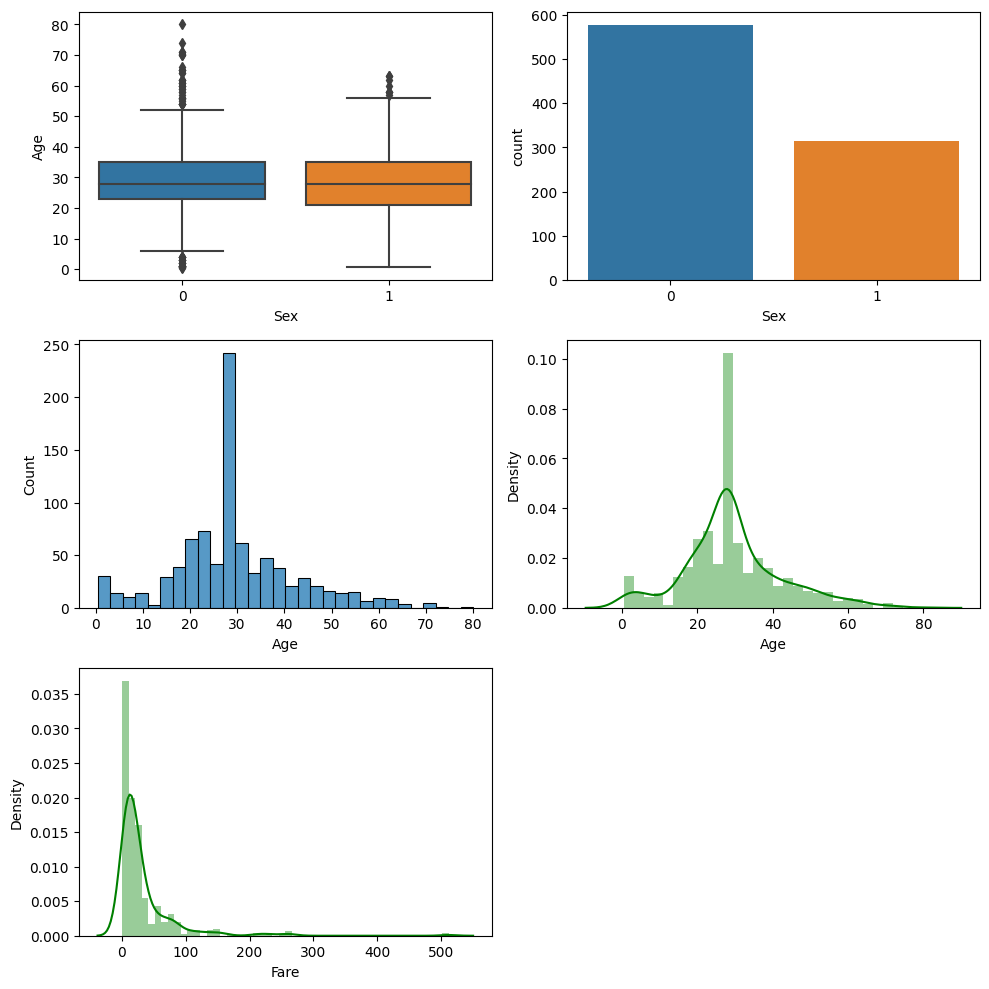

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)

plt.subplot(3,2,2)
sns.countplot(x='Sex', data=df)

plt.subplot(3,2,3)
sns.histplot(df['Age'])

plt.subplot(3,2,4)
sns.distplot(df['Age'],color='g')

plt.subplot(3,2,5)
sns.distplot(df['Fare'],color='g')


plt.tight_layout()
plt.show()

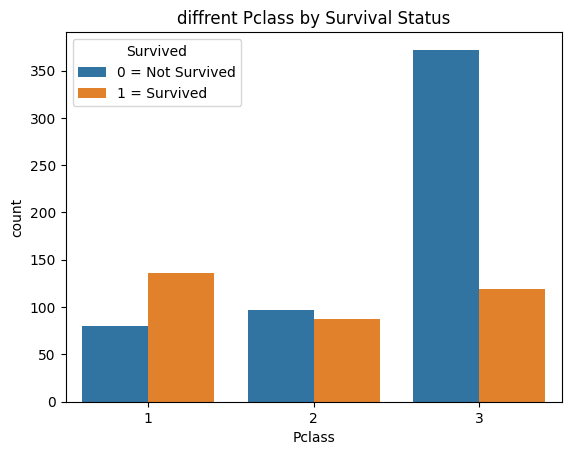

In [17]:
sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

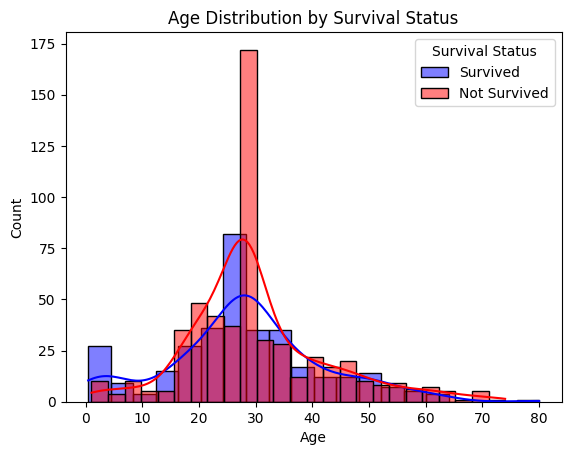

In [18]:
sns.histplot(data=df[df['Survived'] == 1], x='Age', kde=True, color='blue', label='Survived')
sns.histplot(data=df[df['Survived'] == 0], x='Age', kde=True, color='red', label='Not Survived')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival Status')

plt.legend(title='Survival Status')

plt.show()

<Axes: >

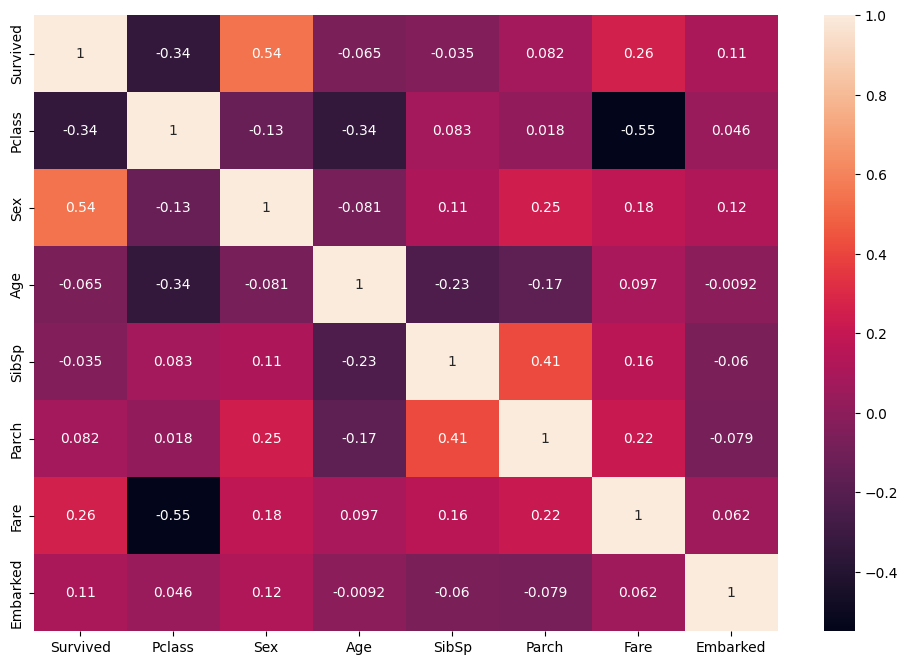

In [19]:
plt.figure(figsize=[12,8])
sns.heatmap(df.corr(),annot=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(['Survived'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train_scaled,y_train)

y_pred1=clf1.predict(X_test_scaled)
accuracy_score(y_test,y_pred1)

0.7653631284916201

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train_scaled,y_train)

y_pred2=clf2.predict(X_test_scaled)
accuracy_score(y_test,y_pred2)

0.8100558659217877

In [23]:
from sklearn.svm import SVC
clf3 = SVC()
clf3.fit(X_train_scaled,y_train)

y_pred3=clf3.predict(X_test_scaled)
accuracy_score(y_test,y_pred3)

0.8044692737430168

In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred4=xgb.predict(X_test_scaled)
accuracy_score(y_test,y_pred4)

0.8100558659217877

In [27]:
from sklearn.naive_bayes import GaussianNB
clf4 = GaussianNB()
clf4.fit(X_train_scaled,y_train)

y_pred5=clf4.predict(X_test_scaled)
accuracy_score(y_test,y_pred5)

0.7541899441340782

In [28]:
X_predict = list(xgb.predict(X_test_scaled))
predicted_df = {'predicted_values': X_predict,'original_values': y_test}
print(pd.DataFrame(predicted_df).head(15))
print('')
print('Here O = not survived and 1 = survived')

     predicted_values  original_values
417                 1                1
307                 1                1
87                  0                0
577                 1                1
684                 0                0
749                 0                0
373                 1                0
112                 0                0
196                 0                0
107                 0                1
424                 0                0
55                  0                1
0                   0                0
80                  0                0
591                 1                1

Here O = not survived and 1 = survived
